Previsão em gradiente descendente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X = [0.5,2.2,2.0]
y = [2.0,2.5,1.4]

In [3]:
# taxa de aprendizado alpha
alpha = 0.01

In [4]:
# witdh pesos iniciais
w0 = 0.1
w1 = 0.1

In [5]:
# hipótese ^Y = W0 + W1X
def y_hat(X, w0, w1):
    return w0 + w1 * X

In [6]:
#predição com custo alto
y_hat(1.5, w0, w1)

0.25

In [7]:
# amostragem gráfica dos valores de X e y (pontos) em relação a reta da hipótese 
def plot_line(X, y, w0, w1):
    x_values = [i for i in range (int(min(X))-1, int(max(X))+2)]
    y_values = [y_hat(X,w0,w1)for X in x_values]
    plt.plot(x_values,y_values,'r')
    plt.plot(X,y,'bo')

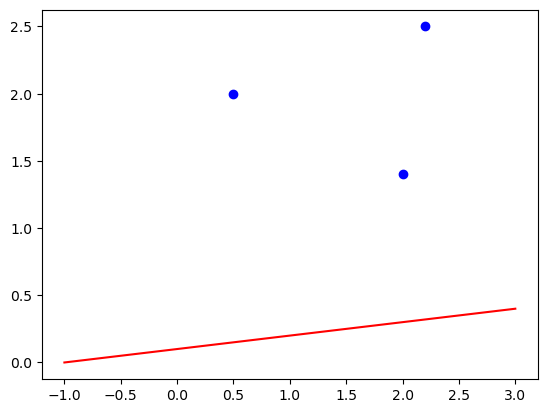

In [8]:
plot_line(X,y,w0,w1)

In [9]:
# função de retorna custo, fórmula: hipótese ^Y - valores Y elevado ao quadrado e divido pela quantidade de amostras M
def MSE (X, y, w0, w1):
    custo = 0 
    m = float(len(X))
    for i in range (0, len(X)):
        custo += (y_hat(X[i], w0, w1)-y[i])**2 
    return custo/m

In [10]:
MSE(X, y, w0, w1)

3.1282999999999994

In [11]:
# funcao que realizar o gradiente descendente retornando novos pesos w0 e w1, fórmula:
# w0 = w0 - alpha * 1/m * erro (^Y - Y)
# w1 = w1 - ahpla * 1/m * erro (^Y - Y) * X(i)
def gradient_descent_step(w0, w1, X, y, alpha):
    erro_w0 = 0
    erro_w1 = 0
    m = float(len(X))

    for i in range(0, len(X)):
        erro_w0 += y_hat(X[i], w0, w1) - y[i]
        erro_w1 += y_hat(X[i], w0, w1) - y[i] * X[i]
    new_w0 = w0 - alpha * (1/m) * erro_w0
    new_w1 = w1 - alpha * (1/m) * erro_w1

    return new_w0, new_w1

In [12]:
w0, w1 = gradient_descent_step(w0, w1, X, y, alpha)

print(w0, w1)

0.11710000000000001 0.12843333333333334


In [13]:
#quantidade de repetições que será usada na função abaixo (gradient_descent)
epoch = 35

In [14]:
# função que repete o gradiente descendente na quantidade definida em "epoch", retornando valores w1, w0 e o custo
def gradient_descent(w0, w1, X, y, alpha, epoch):
    custo = np.zeros(epoch)
    for i in range(epoch):
        w0, w1 = gradient_descent_step(w0, w1, X, y, alpha)
        custo[i] = MSE(X,y,w0,w1)
    return w0, w1, custo

In [15]:
w0, w1, custo = gradient_descent(w0, w1, X, y, alpha, epoch)

Text(0.5, 1.0, 'MSE vs epoch')

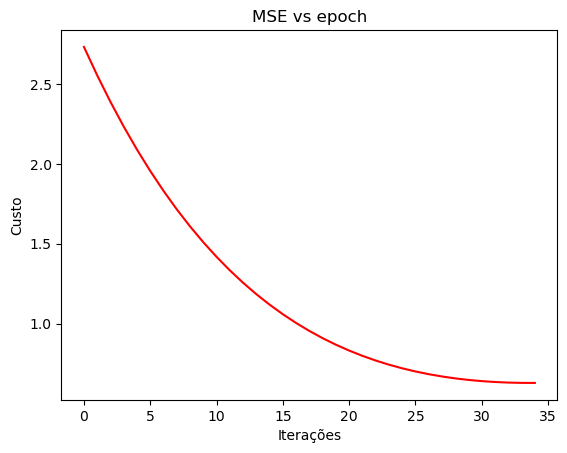

In [16]:
# apresentação gráfica do custo pela quantidade de repetições do gradiente
fig, ax= plt.subplots()
ax.plot(np.arange(epoch), custo, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title("MSE vs epoch")

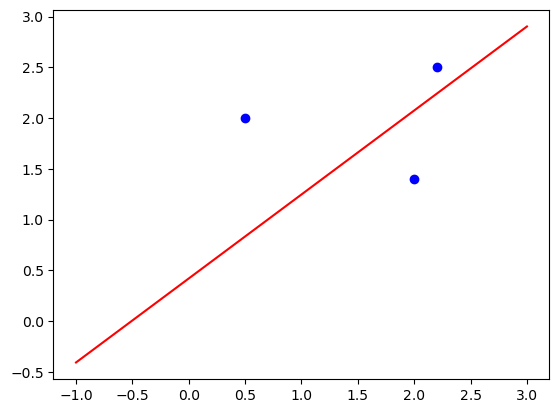

In [17]:
# reta das hipóteses com novos peso w0 e w1 em relação aos dados X e y
plot_line(X,y,w0,w1)

In [18]:
#nova previsão com pesos ajustados
y_hat(1.5, w0, w1)

1.6613593231900374

In [19]:
print (w0, w1)

0.41974372927601517 0.8277437292760149


In [20]:
# predição com pesos ajustados
predict = 2.1
w0 + w1 * predict

2.1580055607556465